# Ufuncs and Aggregation

In [1]:
import numpy as np
import pandas as pd

## Aggregation in Pandas

Aggregations are functions, where one or more dimensions of data are collapsed onto a single value, like the `max`, `sum` or `mean`- functions.

Stat-operations generally *exclude* missing data.

### For Series

In [2]:
a = np.arange(7)
ser = pd.Series(a**2, index=a)
ser

0     0
1     1
2     4
3     9
4    16
5    25
6    36
dtype: int64

In [3]:
ser.sum()
#mean(), median(), min(), max(), ...

91

### For DataFrames

In [4]:
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [5]:
df.mean()

A    13.0
B    63.0
dtype: float64

In [6]:
df.mean(axis=0)

A    13.0
B    63.0
dtype: float64

In [7]:
df.mean(axis='rows')

A    13.0
B    63.0
dtype: float64

In [8]:
df.mean(axis='columns')

0      0.0
1      1.0
2      6.0
3     18.0
4     40.0
5     75.0
6    126.0
dtype: float64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

---
## Ufuncs


We know Ufuncs already from Numpy: It are vectorized functions that change all values of an array simultaneously. 

Pandas does the same, with a nice twist: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.


This means that keeping the context of data and combining data from different sources –both potentially error-prone tasks with raw NumPy arrays– become essentially foolproof ones with Pandas.

In [9]:
rng = np.random.RandomState(0)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


In [10]:
np.exp(df)

,A,B,C,D
0,148.413159,1.000000,20.085537,20.085537
1,1096.633158,8103.083928,20.085537,148.413159
2,7.389056,54.598150,1096.633158,403.428793


### UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data.

In [11]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [12]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [13]:
# area & population
area.index.intersection(population.index)

Index(['Texas', 'California'], dtype='object')

In [14]:
"divide" in dir(pd.DataFrame)

True

In [15]:
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [16]:
popdens = population.divide(area, fill_value=0)
popdens

Alaska         0.000000
California    90.413926
New York            inf
Texas         38.018740
dtype: float64

In [17]:
popdens = popdens.replace([np.inf, -np.inf], np.nan)
popdens.dropna()

Alaska         0.000000
California    90.413926
Texas         38.018740
dtype: float64

In [18]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,12,1
1,6,7


In [19]:
B = pd.DataFrame(rng.randint(0, 20, (3, 3)),
                 columns=list('ABC'))
B

,A,B,C
0,14,17,5
1,13,8,9
2,19,16,19


In [20]:
A+B

,A,B,C
0,26.0,18.0,NaN
1,19.0,15.0,NaN
2,NaN,NaN,NaN


In [21]:
A.add(B, fill_value=0)

,A,B,C
0,26.0,18.0,5.0
1,19.0,15.0,9.0
2,19.0,16.0,19.0


[Here you can find a small exercise](optional_exercises.ipynb#exe05a)
<img src="images/optional_exercises1.png" width="50" style="float: right;"/>

### More Index-Alignment

In [22]:
df = pd.DataFrame({'a': np.random.randint(3, size=10)}, index=np.arange(1, 20, 2))
df

,a
1,2
3,1
5,2
7,0
9,2
11,2
13,1
15,0
17,0
19,0


Let's add a new column to this DataFrame!

In [23]:
tmp = pd.Series([1]*len(df.index))
tmp

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [24]:
# df.align will unify the indices
df.index.union(tmp.index)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 19], dtype='int64')

In [25]:
left_aligned, right_aligned = df.align(tmp, axis=0)
left_aligned

,a
0,NaN
1,2.0
2,NaN
3,1.0
4,NaN
5,2.0
6,NaN
7,0.0
8,NaN
9,2.0


In [26]:
right_aligned

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
11    NaN
13    NaN
15    NaN
17    NaN
19    NaN
dtype: float64

In [27]:
test_left_a, test_right_a = df.align(tmp, axis=0)
test_left_b, test_right_b = tmp.align(df, axis=0)
print(test_left_a.equals(test_right_b))
print(test_right_a.equals(test_left_b))

True
True


In [28]:
tmp = pd.Series([0]*len(df.index), index=df.index)
tmp

1     0
3     0
5     0
7     0
9     0
11    0
13    0
15    0
17    0
19    0
dtype: int64

In [29]:
df['new'] = tmp
df

,a,new
1,2,0
3,1,0
5,2,0
7,0,0
9,2,0
11,2,0
13,1,0
15,0,0
17,0,0
19,0,0


## .agg()

If you want to apply more than one operation (ufunc/aggregation), use `.agg()`:

In [30]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [31]:
df.agg(['sum', np.min])

,A,B,C
sum,12.0,15.0,18.0
amin,1.0,2.0,3.0


In [32]:
#you can also use different aggregations for different columns: 
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [33]:
#also works for ufuncs:
df.agg({'A' : 'exp', 'B' : [np.exp, 'sqrt']})

A            B          
           exp          exp      sqrt
0     2.718282     7.389056  1.414214
1    54.598150   148.413159  2.236068
2  1096.633158  2980.957987  2.828427
3          NaN          NaN       NaN

## apply()

While some ufuncs (like cumsum or exp) are pre-defined by pandas, the method `apply` can be used to run an arbitrary function on all elements of a Series or DataFrame.

In [34]:
a = np.arange(7)
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [35]:
df.cumsum()

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


In [36]:
df.apply(np.cumsum)

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


Using Lambda-functions, we can combine `apply` with arbitrary functions. Note that the argument of the function is always an entire column of the dataset.

In [37]:
df.apply(lambda x: print(x, end='\n\n'))

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: A, dtype: int64

0      0
1      1
2      8
3     27
4     64
5    125
6    216
Name: B, dtype: int64



A    None
B    None
dtype: object

In [38]:
df['A'] + 1

0     1
1     2
2     5
3    10
4    17
5    26
6    37
Name: A, dtype: int64

In [ ]:
df.apply(lambda x: x+1)

In [ ]:
def my_more_complex_func(ser):
    res = [9]
    for elem in ser:
        print(elem if elem > 16 else -elem)
        res.append(elem if elem > 16 else -elem)
    return res

In [ ]:
df.apply(my_more_complex_func)

In [ ]:
df

In [ ]:
df.apply(lambda x: x.max() - x.min())

Note that `apply` works for both DataFrames and Series!

In [ ]:
df["A"].apply(lambda x: print(x,"\n"))

In [ ]:
df["A_normed"] = df["A"].apply(lambda x: x/df["A"].max())
df

It can be very useful to use dictionaries in combination with the apply-function!

In [ ]:
z_moves = {"Normal": "Breakneck Blitz", "Fighting": "All-Out Pummeling", "Flying": "Supersonic Skystrike", "Poison": "Acid Downpour", "Ground": "Tectonic Rage", "Rock": "Continental Crush", "Bug": "Savage Spin-Out", "Ghost": "Never-Ending Nightmare",
"Steel": "Corkscrew Crash", "Fire": "Inferno Overdrive", "Water": "Hydro Vortex", "Grass": "Bloom Doom", "Electric": "Gigavolt Havoc", "Psychic": "Shattered Psyche", "Ice": "Subzero Slammer", "Dragon": "Devastating Drake", "Dark": "Black Hole Eclipse", "Fairy": "Twinkle Tackle"}
df = pd.read_csv("Pokemon.csv")
df.head()

In [ ]:
df["Z-Move"] = df["Type 1"].apply(lambda x:z_moves[x])
df.head()

Using `apply`, we can also convert a list of Series into a DataFrame, by making the individual columns to Series:

In [ ]:
s = pd.Series([ ['Red', 'Green', 'White'], ['Red', 'Black'], ['Yellow']]) 
print(type(s))
s

In [ ]:
pd.Series([1, 2, 3])

In [ ]:
df = s.apply(pd.Series)
print(type(df))
df

**Note on speed:**

According to ([1]), `apply()` is twice as fast as looping through a df's `iterrows()`, and 8 times as fast as looping over python lists.

Note however, that while `apply()` is much faster at looping over the rows of your DataFrame/Series (by taking advantage of a number of internal optimizations, such as using iterators in Cython), it still inherently loops through rows. Whatever you're applying, you're still executing it once for every row. So, wherever you can make use of vectorized Ufuncs, do so - that is far more optimized and parallelized - for ([1]) exchanging the haversine distance formula with it's vectorized counterpart led to a 50-fold-decrease in time!

\(1): https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6


[1]: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6 

[Here you can find a small exercise](optional_exercises.ipynb#exe05b)
<img src="images/optional_exercises1.png" width="50" style="float: right;"/>

# Group-By

## Split-Apply-Combine

While simple operations are already pre-defined by pandas, custom aggregations and operations can be performed via **group-by**. The group-by operation can be described as having the following steps:

* **Splitting** the data into groups based on some criteria (breaking up and grouping depending on the value of a key)
* **Applying** a function to each group independently (aggregation, transformation, filtering, ...)
* **Combining** the results into a data structure

A typical example, for where the *apply* is a summerization aggregation, is illustrated here:

![](./images/split-apply-combine.png)

In [41]:
tmp = np.array([list("ABCABC"), np.arange(1,7)]).T
tmp

array([['A', '1'],
       ['B', '2'],
       ['C', '3'],
       ['A', '4'],
       ['B', '5'],
       ['C', '6']], dtype='<U21')

In [42]:
df = pd.DataFrame(tmp, columns=["key", "data"])
df["data"] = pd.to_numeric(df["data"])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [45]:
df.groupby("key")

Note that what is returned is not a set of `DataFrames`, but a `DataFrameGroupBy` object. This object is where the magic is: you can think of it as a special view of the `DataFrames`, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this `DataFrameGroupBy` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [46]:
df.groupby("key").sum().reset_index()

,key,data
0,A,5
1,B,7
2,C,9


In [47]:
df.groupby("key")["data"].sum()
# we can do column indexing just like on a normal DataFrame

key
A    5
B    7
C    9
Name: data, dtype: int64

Sometimes making a proper DataFrame out of the result requires some index name adjustments. There are usually multiple ways and it is necessary to put some thought into what you want to end up with in each situation.

In [48]:
# Sometimes making a proper DataFrame out of the result requires some index name adjustments
print(pd.DataFrame(df.groupby("key")["data"].sum().rename_axis(None)))
print(df.groupby("key")["data"].sum().reset_index())

   data
A     5
B     7
C     9
  key  data
0   A     5
1   B     7
2   C     9


### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [49]:
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [52]:
for (key, _) in df.groupby("key"):
    print('key', key)
    
print()
for (_, group) in df.groupby("key"):
    print('group', "\n", group, "\n")

key A
key B
key C

group 
   key  data
0   A     1
3   A     4 

group 
   key  data
1   B     2
4   B     5 

group 
   key  data
2   C     3
5   C     6 



### Dispatch methods

Any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [53]:
df.describe()

,data
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [54]:
df.groupby("key").describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
B     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0
C     2.0  4.5  2.12132  3.0  3.75  4.5  5.25  6.0

[Here you can find a small exercise](optional_exercises.ipynb#exe05c)
<img src="images/optional_exercises1.png" width="50" style="float: right;"/>

## Aggregate, filter, transform, apply

So far, we focused on aggregation for the apply operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [55]:
def create_df():
    rng = np.random.RandomState(0)
    df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'data1': range(6),
                       'data2': rng.randint(0, 10, 6)},
                       columns = ['key', 'data1', 'data2'])
    return df
    
df = create_df()
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation

While we used some *aggregate-functions* already, the function `aggregate` (or ``agg``) is the explicit version thereof.  
It can take a string, a function, or a list thereof, and compute all the aggregates at once.

In [56]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [57]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping (old) column names to operations to be applied on that column:

In [58]:
df.groupby('key').agg({'data1': 'min',
                       'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [59]:
df.groupby('key').aggregate({'data1': np.sum,
                             'data2': lambda x: np.std(x, ddof=1)})

,data1,data2
key,,
A,3,1.414214
B,5,4.949747
C,7,4.242641


### Named aggregation

To support column-specific aggregation with control over the *output* column names, pandas accepts so-called named aggregation in `GroupBy.agg()`, where:

* The keywords are the output column names
* The values are tuples whose first element is the column to select and the second element is the aggregation to apply to that column. 
    * Alternatively, you can use the pandas.NamedAgg namedtuple with the fields ['column', 'aggfunc'] to make it clearer what the arguments are. 

In [60]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [61]:
assert int(pd.__version__[0]) >= 1, 'Your version of pandas is too old for this!'

In [62]:
animals.groupby("kind").agg(
       min_height = pd.NamedAgg(column='height', aggfunc='min'), # using NamedAgg
       max_height = ('height', 'max'), # less explicit alternative
       average_weight = pd.NamedAgg(column='weight', aggfunc=np.mean),
    )

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [63]:
def filter_func(x):
    print(x,"\n")
    return x['data2'].std() > 4

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [64]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [65]:
df.groupby('key').filter(filter_func)
#note that this is not an aggregate - the result has the shape of the original DataFrame, just with certain lines left out!

  key  data1  data2
0   A      0      5
3   A      3      3 

  key  data1  data2
1   B      1      0
4   B      4      7 

  key  data1  data2
2   C      2      3
5   C      5      9 



,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

First, remember our ``apply`` from before:

In [66]:
create_df()

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [67]:
df = create_df()
df["data1"] = df["data1"].apply(lambda x: x/df["data1"].max())
df

,key,data1,data2
0,A,0.0,5
1,B,0.2,0
2,C,0.4,3
3,A,0.6,3
4,B,0.8,7
5,C,1.0,9


Keep in mind that ``groupby`` only returns a *view of the original DataFrame*.  
Here is an ``apply()`` that normalizes the (grouped) first column with respect to each groups maximum:

In [68]:
import warnings; warnings.filterwarnings('ignore')
try:
    del newdf
except:
    pass

In [69]:
df = create_df()
maxvals = df.groupby('key')["data1"].max()
print(maxvals, '\n\n\n')
for key, group in df.groupby('key'):
    group["data1"] /= maxvals[key]
    try:
        newdf = newdf.append(group) #appending to dataframes is bad style!
    except:
        newdf = group.copy()
    print(newdf, '\n')

newdf

key
A    3
B    4
C    5
Name: data1, dtype: int64 



  key  data1  data2
0   A    0.0      5
3   A    1.0      3 

  key  data1  data2
1   B   0.25      0
4   B   1.00      7 

  key  data1  data2
2   C    0.4      3
5   C    1.0      9 



,key,data1,data2
2,C,0.4,3
5,C,1.0,9


In [70]:
def norm_by_data1(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data1'].max()
    return x

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [71]:
df.groupby('key').apply(norm_by_data1)

key  data1  data2
key                    
A   0   A   0.00      5
    3   A   1.00      3
B   1   B   0.25      0
    4   B   1.00      7
C   2   C   0.40      3
    5   C   1.00      9

## Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

### A list, array, series, or index providing the grouping keys

The keys (= new column names) can be any series or list with a length matching that of the ``DataFrame`` (the last key will relate to the last dataframe row). For example:

In [72]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [73]:
L = [0, "group 1", 0, "group 1", 2, 0]
df.groupby(L).max()

,key,data1,data2
0,C,5,9
2,B,4,7
group 1,B,3,3


### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [74]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [75]:
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


Grouping by multiple columns forms a hierarchical index

In [76]:
df2.groupby([mapping, "key"]).sum()

data1  data2
key       key              
consonant B        5      7
          C        7     12
vowel     A        3      8

In [77]:
df = create_df()
df["key2"] = ["D", "D", "E", "D", "E", "F"]
print(df)
df.groupby(["key", "key2"]).sum()

  key  data1  data2 key2
0   A      0      5    D
1   B      1      0    D
2   C      2      3    E
3   A      3      3    D
4   B      4      7    E
5   C      5      9    F


data1  data2
key key2              
A   D         3      8
B   D         1      0
    E         4      7
C   E         2      3
    F         5      9

Video tutorial from Pycon 2015

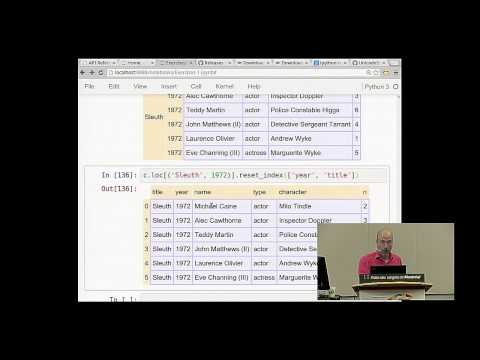

In [78]:
from IPython.display import YouTubeVideo
YouTubeVideo('5JnMutdy6Fw')

[One last exercise for this week](optional_exercises.ipynb#exe05d)
<img src="images/optional_exercises1.png" width="50" style="float: right;"/>